# Analysis of USA Auto Sales History in order to predict car prices


#### Goal: Prepare data and finalize features from the entire data set which can be used to create our modelling algorithm


We would be using the data source archived in the location https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

The following steps would be undertaken as part of the data analysis exercise

1. read the data from the remote location
2. provide appropriate column headers
3. provide description of the data along with division of numeric and non numeric values
4. Provide stats such as unique counts, top values, inter quartile range
5. Check for non empty values and decide on whether to drop values or replace. Provide justification for each
6. Provide data normalization for numeric features. Decide which columns require data normalization
7. Provide data bining functionality for categorical numeric or non numeric values. Provide justification for each.
8. Perform grouping of features vs price exercises to display relation between price and features
9. Provide heat map to display correlation between features. ALso provide any other charts/graphs as deemed necessary.
10. Provide coefficient values and p values to decide on which features to finalize for modelling of algorithm. 


In [1]:

import pandas as panda

remote_location = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]


In [2]:

## we had a look at the data placed in the remote location and found that the data is without any headers. 
## hence we pass the arguments, headers = None
data = panda.read_csv(remote_location, header = None) 

data_dimensions = data.shape
print("The dimensions of data downloaded is %d rows * %d columns" %(data_dimensions[0], data_dimensions[1] ))

The dimensions of data downloaded is 205 rows * 26 columns


In [3]:
## we are going to assign headers to the data downloaded.
## we are also going to rename the headers all to lowercase for standardization purposes (this is an optional step)
## and then we are going to print the first 10 rows and last ten rows for simply eyeballing part of the data

data.columns = [ i.lower() for i in headers]

print("************ Top ten rows ************")
print(data.head(10))



print("************ Bottom ten rows ************")
print(data.tail(10))


************ Top ten rows ************
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...    engin

At this point we are done with our steps 1 and 2.

A few things to notice so far:

1. our data has 205 rows
2. our data has 26 columns
3. our data has the value that we would like to predict, i.e. price. This point is important since this signifies our learning algorithm can be a supervised learning algorithm


Our next step would be to analyze the data further. We would like to check the data types of the data provided, and check if it requires updating. We would also check the data formats of the data provided and once again, check if it requires updating



In [4]:
## we will check for the data types in the data provided and give a count of the unique data types provided

data.info() ## for simple eyeballing of the data provided. gives us overview of datatypes across columns
data_types = data.dtypes ##data_types returned is an instance of pandas.DataSeries class

## value_counts gives us a result of number of unique data types in the entire data. value_counts is an attribute only present in DataSeries and not in DataFrame

print(data_types.value_counts())


## a longer way to achieve the above is given below, where we convert it to data frame and reset indices and run a groupby and count command
## FYI - data.info() would have also given DataFrame instance automatically.
# data_types = panda.DataFrame(data_types, columns = ['column_type'])
# data_types.index.name = 'column_name'

# data_types.reset_index(inplace = True)
# print(data_types.groupby( by = 'column_type', as_index = False).count())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

 We can see that the breakdown of data types is as below:
 
object     16

float64     5

int64       5


**********************************************************************************************************

Some random observations just based on eyeballing the data and the datatype information above :

1. There are too many string or object data types. Statistical analysis proves difficult for non numerical data and we will need to check if data types can be updated

2. Data types which require updating (from simple eyeballing the data) are price, normalized losses, horsepower ,etc

P.S :Before updating the data types though, we would like to check for empty values and how to handle the same

************************************************************************************************************



We will now proceed to provide some statistics of numeric data and non numeric data as well


 
 

In [5]:
## we will call describe method of pandas data frame to show us data statistics for numeric columns.

## the below two lines could have been combined using include =áll keyword, but i prefer separation
print(data.describe())

print(data.describe(include = 'object'))

        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

Observations we can make from the statistical description of each columns:

1. Price, normalized-losses columns have value ?. This needs to be converted to numpy.NaN values so that our data casting can be done


2. Curb weight has huge range of values which can lead to curb weight dictating models. Hence we would need to normalize our data


3. Make of car Toyota appears 32 times in the 206 rows of data. So we may notice that data of only one model is not collected, our model data is also present. However the maximum amount of data is available for Toyota however this will not lead to skewed results since it appears only 32 times in 206 records (a bit over 10%)


4. Engine location topmost value appears 202 times out of 206 records. We may assume engine location at top is a standard feature across cars and hence will not be impacting/dictating price of cars. Hence we may remove this from our data features



5. columns such has fuel-type, drive-wheels, aspirations, num-of-cylinders. num-of-doors, engine-type all have very few number of unique values and the top most occuring value appears more than 100 out of total of 205 rows. We would need to carefully check the correlation between these values and price in order to decide if they need to be considered as a data feature. (We would be using pearson coefficient and p value to decide)



At this point we are done with our steps 3 and 4.

We would now proceed to deal with missing data

1. Show which columns, if any, have missing data

2. Price and normalized-losses both have ? as missing values. That needs to be converted to NaN value

3. Price is what we need to predict and having a target with blank value does not make sense and hence we would drop that row

4. normalized-losses has numeric values. we would replace missing values( at this point numpy.NaN value) with mean of the data 


In [6]:

import numpy
data.replace('?', numpy.nan, inplace = True) ## inplace marked as true , hence we are modifying original data

temp_null_data_check = data.isnull()
empty_column_list = {}

for col in temp_null_data_check.columns.tolist():
    values = temp_null_data_check[col].values
    
    if True in values :
        empty_column_list[col] = {'missing_count' : list(values).count(True), 'data_type' : data[col].dtype.name} ##dtype is numpy.dtype instance, value is numpy.darray instance
        

print(empty_column_list)


## another way to achieve the above is give below.
# empty_values = data.isnull().sum().to_frame()
# empty_values= empty_values.assign(column_type = data.dtypes)
# empty_values

{'normalized-losses': {'missing_count': 41, 'data_type': 'object'}, 'num-of-doors': {'missing_count': 2, 'data_type': 'object'}, 'bore': {'missing_count': 4, 'data_type': 'object'}, 'stroke': {'missing_count': 4, 'data_type': 'object'}, 'horsepower': {'missing_count': 2, 'data_type': 'object'}, 'peak-rpm': {'missing_count': 2, 'data_type': 'object'}, 'price': {'missing_count': 4, 'data_type': 'object'}}




From the above analysis , we get the following data:

-  'normalized-losses': {'missing_count': 41, 'data_type': 'object'}

-  'num-of-doors': {'missing_count': 2, 'data_type': 'object'}

-  'bore': {'missing_count': 4, 'data_type': 'object'}

-  'stroke': {'missing_count': 4, 'data_type': 'object'}

-  'horsepower': {'missing_count': 2, 'data_type': 'object'}

-  'peak-rpm': {'missing_count': 2, 'data_type': 'object'}

-  'price': {'missing_count': 4, 'data_type': 'object'}}




These are the following actions we are going to take based on the above:

1. price is our target value for our supervised learning data set. Having empty value for target does not make sense. Similarly, we cant assign average value for the empty cell as that would be incorrect understanding. Hence we are going to drop the row with empty price cell. Since we are dropping this particular row, all our mean calculations will be done only post this step


2. we are going to convert the price to float data type



3. normalized losses column has a huge number of empty values, close to 20% of our number of rows. From our earlier analysis we also know this is a numeric column. SO we are going to replace empty values with average of the normalized losses and check to see correlation with price later on based on that assumption



4. we are also going to convert normalized losses to float64 datatype



5. number of doors has a frequency of value 4 for 114 entries and it has only 2 values missing. We are going to replace missing value with the topmost appearing value which is 4. We are also going to convert the column to int64


6. Actions for bore, horsepower,stroke,peak-rpm will be similar to step 3 and 4 above



In [7]:

## we can drop rows where all the values are NaN. THat is empty rows by using the command data.dropna(how='all')

## drop row with empty price cell
 
data.dropna(inplace = True, axis =0, subset = ['price'])

data['price'] = data['price'].astype('float64')

## check to see if the row has been dropped
numpy.nan in data['price'].values

## convert data types for normalized losses, horsepower, bore, stroke, peak -rpm  since we are going to perform mathematical operation

data[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']] = data[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']].astype('float64')

## calculate mean of normalized losses, horsepower, bore, stroke, peak -rpm

normalized_losses_mean = data['normalized-losses'].mean()
bore_mean              = data['bore'].mean()
stroke_mean            = data['stroke'].mean()
horsepower_mean        = data['horsepower'].mean()
peak_rpm_mean          = data['peak-rpm'].mean()

## assign missing values to the individual mean value


data['normalized-losses'].replace(to_replace = numpy.nan, value = normalized_losses_mean, inplace =True)
data['bore'].replace(to_replace = numpy.nan, value = bore_mean, inplace =True)
data['stroke'].replace(to_replace = numpy.nan, value = stroke_mean, inplace =True)
data['horsepower'].replace(to_replace = numpy.nan, value = horsepower_mean, inplace =True)
data['peak-rpm'].replace(to_replace = numpy.nan, value = peak_rpm_mean, inplace =True)

## sklearn.impute.SimpleImputer is in latest version and not available yet.
## code in case of SimpleIMputer would have been SimpleImputer(missing = numpy.nan, strategy = 'mean'). and then fit_trasnform

# from sklearn.preprocessing import Imputer

# imputer = Imputer(missing_values = numpy.nan, strategy = 'mean', axis = 0)
# data = imputer.fit_transform(data.values)

print("peak rpm summation after mean calc %s" %data['peak-rpm'].sum())
print("horsepower summation after mean calc %s" %data['horsepower'].sum())
print("stroke summation after mean calc %s" %data['stroke'].sum())
print("bore summation after mean calc %s" %data['bore'].sum())
print("normalized-losses summation after mean calc %s" %data['normalized-losses'].sum())
## we can use the sklearn.impute.SimpleImputer with strategy mean to transform all the above 4 values at one shot

## calculate top value for number of doors and replace empty value with it

number_of_doors_top_value = data['num-of-doors'].value_counts().idxmax()

data['num-of-doors'].replace(to_replace = numpy.nan, value = number_of_doors_top_value, inplace =True)


## run the empty values check again


temp_null_data_check = data.isnull()
empty_column_list = {}

for col in temp_null_data_check.columns.tolist():
    values = temp_null_data_check[col].values
    
    if True in values :
        empty_column_list[col] = {'missing_count' : list(values).count(True), 'data_type' : data[col].dtype.name} ##dtype is numpy.dtype instance, value is numpy.darray instance
        

if not empty_column_list:
    print("Successfully completed all empty values replacement")
# print(empty_column_list) ## empty dict means our empty values replacement is successfully completed



peak rpm summation after mean calc 1028635.175879397
horsepower summation after mean calc 20782.79396984925
stroke summation after mean calc 654.6376142131978
bore summation after mean calc 669.4728426395939
normalized-losses summation after mean calc 24522.0
Successfully completed all empty values replacement




Now that all our data has been cleared of empty values and data types has been assigned correctly, we would start by observing the range of values for numeric inputs and checking to see if certain columns require normalization.

In order to do so, we would again describe our data sets for only the numeric values
TODO: to be done after question regarding normalization is answered


We would now proceed to perform certain actions that are deemed necessary (based on business knowledge) eg data binning.

We can see horsepower attribute has 57 unique numerical values, however we are not interested in getting exact numeric values. Instead we are interested in calculations based on higher , lower , medium horsepower values. SO we would convert our numeric range of data for horsepower into bins of data.


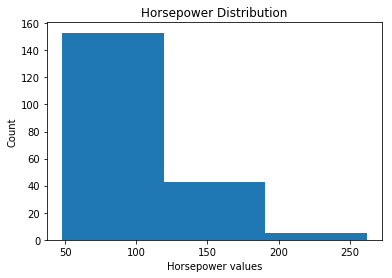

C:\Users\somak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64


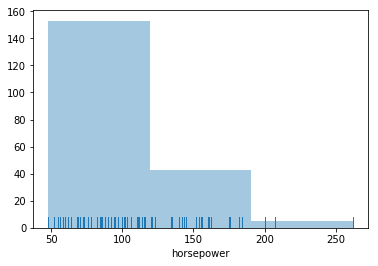

In [8]:


###lets draw a histogram for showing data distribution
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn as sns

plot.hist(data['horsepower'], bins = 3)
plot.title('Horsepower Distribution')
plot.xlabel("Horsepower values")
plot.ylabel("Count")

plot.show()

sns.distplot(data['horsepower'], bins =3, kde=False, rug=True)



## get the range of values for horsepower, the min and the max

min_horse_power = data['horsepower'].min()
max_horse_power = data['horsepower'].max()

## set the number of bins you require and provide names for the same

bin_labels = ['low', 'medium', 'high']
bin_count = 4  ## cut function has default rightmost edge as true.

## lets say we knew which numbers to classify as low, medium and high. say from a given range of [0,20]  we 
## say numbers within 0 - 7 is low, 7 - 14 is medium and 14 - 20 is high. so our bins are essentially [0,7,14,20] i.e one higher
## than the number of labels. 

## we dont want to decide the ranges for bins . we let numpy decide the same
## using linspace, which returns evenly spaced numbers using intervals

bins = numpy.linspace(start = min_horse_power, stop = max_horse_power, num = 4)
# print(bins,min_horse_power,max_horse_power)

## convert data into bins

data['horsepower-binned'] = panda.cut(data['horsepower'], bins, labels = bin_labels ,include_lowest = True )

# print(data[['horsepower','horsepower-binned']].head(20))
print(data['horsepower-binned'].value_counts())







We observe columns such as fuel-type and aspiration have only two unique values and both these values are non-numeric. Since non numeric values prove difficult values for regression analysis we are going to convert these values to a numeric number and change the data type.

How do we convert these categorical values to numeric values? Say for fuel type, diesel is assigned a value of 1 and gas is assigned a value of 0.



In [9]:

## another way of achieving the below is to use the panda.get_dummies method
## another technique is to use the map function. v = {'gas' :1, 'diesel' : 0}. data[].map(V)

data['fuel-type'] = data['fuel-type'].apply(lambda x: 1 if x == 'gas' else 0 )
data['fuel-type'] = data['fuel-type'].astype('int64')


data['fuel-type'].value_counts()


1    181
0     20
Name: fuel-type, dtype: int64

In [10]:
data['aspiration'] = data['aspiration'].apply(lambda x: 1 if x == 'std' else 0 )
data['aspiration'] = data['aspiration'].astype('int64')


data['aspiration'].value_counts()

1    165
0     36
Name: aspiration, dtype: int64



We also observe engine-location also has only two unique values, however since we already decided previously that engine location does not impact the price of the vehicle we are going to ignore updating/changing this particular attribute

Time to find out correlation of the remaining attributes and price target.

1. we would be drawing regression plots to view the dependence between attribute and target price


2. we would calculate the pearson coefficient and p value and mark them as legends on the graph


3. We also know that pearson coefficient is sensitive to outliers. Hence we would be plotting boxplots for the attributes to see if there are outliers



*** How do we deal with outliers. We may remove rows with outlier values and check how they impact the analysis.



Lets decide on the following attributes which would undergo the above analysis:




<li>symboling</li>
<li>normalized-losses</li>
<li>make</li>
<li>fuel-type</li>
<li>aspiration</li>
<li>num</li>
<li>body-style</li>
<li>drive-wheels</li>
<li>wheel-base</li>
<li>length</li>
<li>width</li>
<li>height</li>
<li>curb-weight</li>
<li>engine-type</li>
<li>num-of-cylinders</li>
<li>engine-size</li>
<li>fuel-system</li>
<li>bore</li>
<li>stroke</li>
<li>compression-ratio</li>
<li>horsepower</li>
<li>peak-rpm</li>
<li>city-mpg</li>
<li>highway-mpg</li>




A couple of the above values are numeric and some are categorical. Hence analysis would be separate for each






In [11]:


## describe the numeric columns which we think are likely to impact price target 
## (we would perform the same for categorical values later). we want to confirm our assumption

print(data[['symboling', 'normalized-losses' , 'length', 'width', 'height', 'curb-weight', 'engine-size']].describe(include = 'all'))

data[['symboling', 'normalized-losses' , 'length', 'width', 'height', 'curb-weight', 'engine-size']].corr()

        symboling  normalized-losses      length       width      height  \
count  201.000000          201.00000  201.000000  201.000000  201.000000   
mean     0.840796          122.00000  174.200995   65.889055   53.766667   
std      1.254802           31.99625   12.322175    2.101471    2.447822   
min     -2.000000           65.00000  141.100000   60.300000   47.800000   
25%      0.000000          101.00000  166.800000   64.100000   52.000000   
50%      1.000000          122.00000  173.200000   65.500000   54.100000   
75%      2.000000          137.00000  183.500000   66.600000   55.500000   
max      3.000000          256.00000  208.100000   72.000000   59.800000   

       curb-weight  engine-size  
count   201.000000   201.000000  
mean   2555.666667   126.875622  
std     517.296727    41.546834  
min    1488.000000    61.000000  
25%    2169.000000    98.000000  
50%    2414.000000   120.000000  
75%    2926.000000   141.000000  
max    4066.000000   326.000000  


,symboling,normalized-losses,length,width,height,curb-weight,engine-size
symboling,1.000000,0.466264,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581
normalized-losses,0.466264,1.000000,0.019424,0.086802,-0.373737,0.099404,0.112360
length,-0.365404,0.019424,1.000000,0.857170,0.492063,0.880665,0.685025
width,-0.242423,0.086802,0.857170,1.000000,0.306002,0.866201,0.729436
height,-0.550160,-0.373737,0.492063,0.306002,1.000000,0.307581,0.074694
curb-weight,-0.233118,0.099404,0.880665,0.866201,0.307581,1.000000,0.849072
engine-size,-0.110581,0.112360,0.685025,0.729436,0.074694,0.849072,1.000000


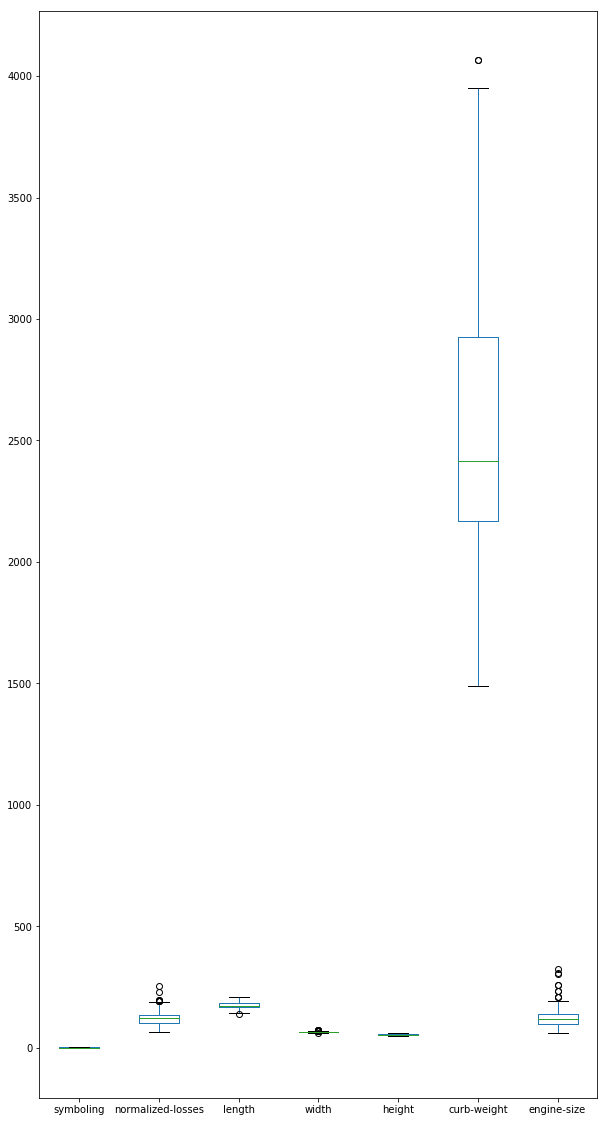

In [12]:


## plotting boxplots for the above 7 attributes to check for outliers and inter quartile ranges

%matplotlib inline

data[['symboling', 'normalized-losses' , 'length', 'width', 'height', 'curb-weight', 'engine-size']].plot(kind= 'box', figsize =(10,20))
plot.show()





We can make the following observations from the box plot above:
    
    1.  symboling has a very lower range of values with hardly any outliers. Hardly any outliers means our coefficients values are going to be truly representatice of correlation
    
    
    2. width and height are almost in the same range. however length has very different upper scales , eg. min value of length is higher than max value of both these attributes. Its time to normalize these attributes and plot them again
    
    
    3. engine size has quite a few outliers
    
    
Pearson coefficient is meant to be read as below:

 close to 1 : totally correlated
 
 close to 0 : no correlation, values do not impact one another
 
 close to -1 : negatively correlated
 
 P value is meant to be read as below: ( p value is probability that values are related to one another)
 
 < 0.001 : very strong correlation ( 99% probability we can say that values are correlated)
 
 < 0.05 : strong correlation ( 95% probability we can say that values are correlated)
 
 < 0.1  : there is weak evidence that the correlation is significant, and

 \>  0.1 : there is no evidence that the correlation is significant.
 
 
    
    
    

In [13]:
from scipy import stats


def calculateCorrelationCoefficientsAndpValues(x_data, y_data):
    
    pearson_coef, p_value = stats.pearsonr(x_data, y_data)
    print("The Pearson Correlation Coefficient is %s with a P-value of P = %s" %(pearson_coef, p_value))
    
    return (pearson_coef,p_value)

def plotRegressionBetweenTwoVariables(x_label,y_label, x_y_data, pearson_coef, p_value):
    
    plot.figure(figsize=(15,15))
    
    sns.regplot(x = x_label , y = y_label , data = x_y_data)


    # plot.text(x = 1, y = 40000 , s ="Pearson Correlation Coefficient = %s"%pearson_coef, fontsize = 12 )
    # plot.text(x = 1, y = 38000 , s ="P value = %s"%p_value, fontsize = 12 )

    import matplotlib.patches as mpatches
    import matplotlib.pyplot as plt

    blue_patch = mpatches.Patch(color='blue', label='Pearson Correlation Coefficient = %s, p value is %s '%(pearson_coef, p_value))
    plot.legend(handles=[blue_patch], loc ='best')
    plot.title("Regression Plot %s vs %s"%(x_label, y_label))
    
    

    

The Pearson Correlation Coefficient is -0.08239118716962357 with a P-value of P = 0.24491487657165062


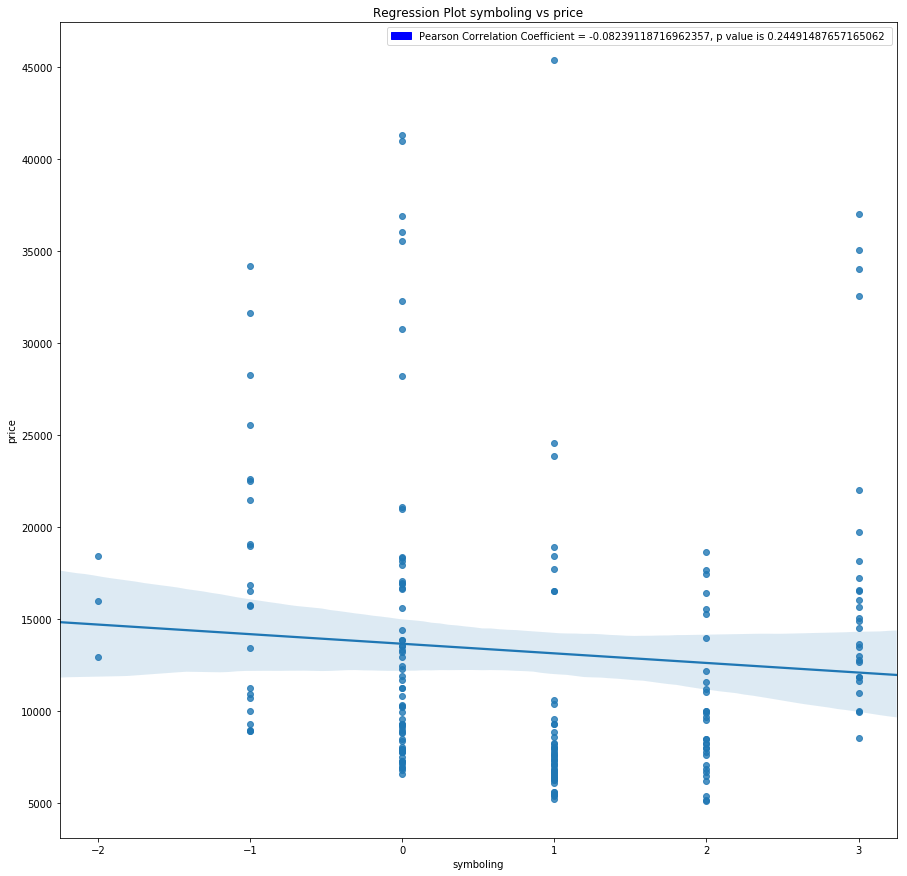

In [14]:
from scipy import stats

## checking correlation between symbolizing and target price
data['symboling'] = data['symboling'].astype('float64')

coeff_values = calculateCorrelationCoefficientsAndpValues(data['symboling'], data['price'])
plotRegressionBetweenTwoVariables( 'symboling', 'price', data[['symboling', 'price']], coeff_values[0], coeff_values[1])





Let us now normalize the values for lengt, width and height and draw the regplto and calculate coefficients




In [15]:
## we will use the min max technique for normalization of length, width and height
## min-max technique is x-min/max-min. values range betoiwwen 0 and 1
## other technique is z score which is x - mean/std deviation. values range betwwen -inf to inf (however typical is 0 to -3 to +3)
## the otehr is feature scaling which is x/ max . values range between 0 and 1



data['length'] = (data['length'] - data['length'].min())/ (data['length'].max() - data['length'].min())

data['width'] = (data['width'] - data['width'].min())/ (data['width'].max() - data['width'].min())

data['height'] = (data['height'] - data['height'].min())/ (data['height'].max() - data['height'].min())

The Pearson Correlation Coefficient is 0.690628380448364 with a P-value of P = 8.016477466159053e-30


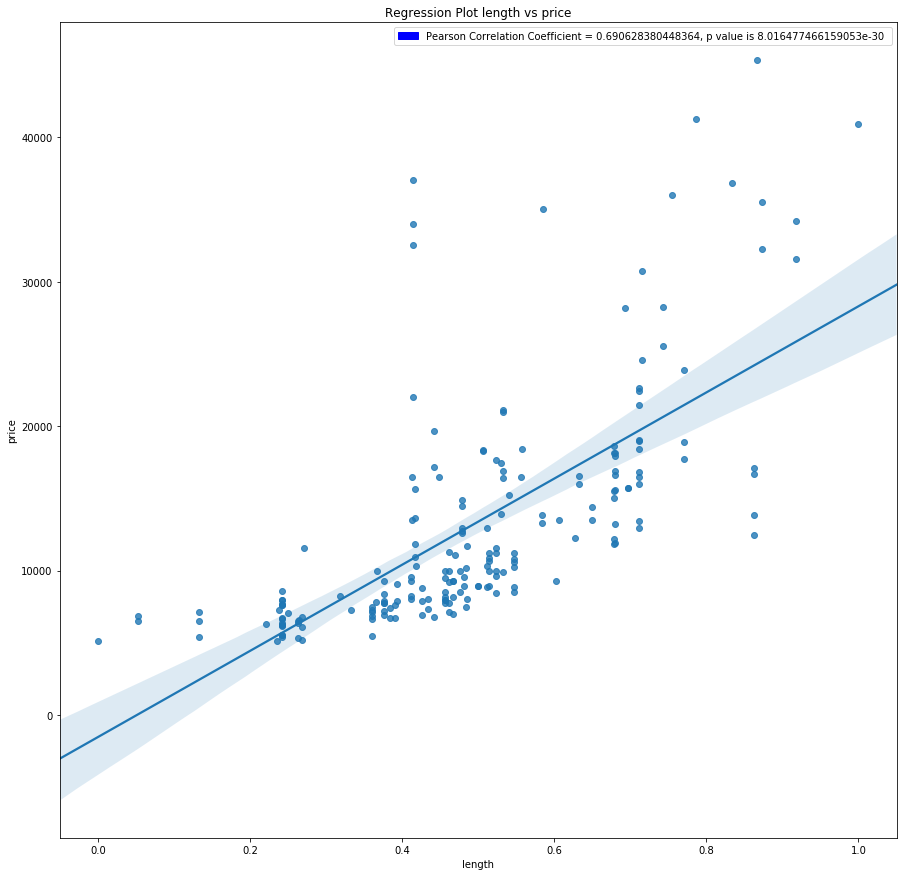

In [16]:
## drawing plots and calculation of coefficients of each

coeff_values = calculateCorrelationCoefficientsAndpValues(data['length'], data['price'])
plotRegressionBetweenTwoVariables( 'length', 'price', data[['length', 'price']], coeff_values[0], coeff_values[1])








The Pearson Correlation Coefficient is 0.7512653440522673 with a P-value of P = 9.20033551048166e-38


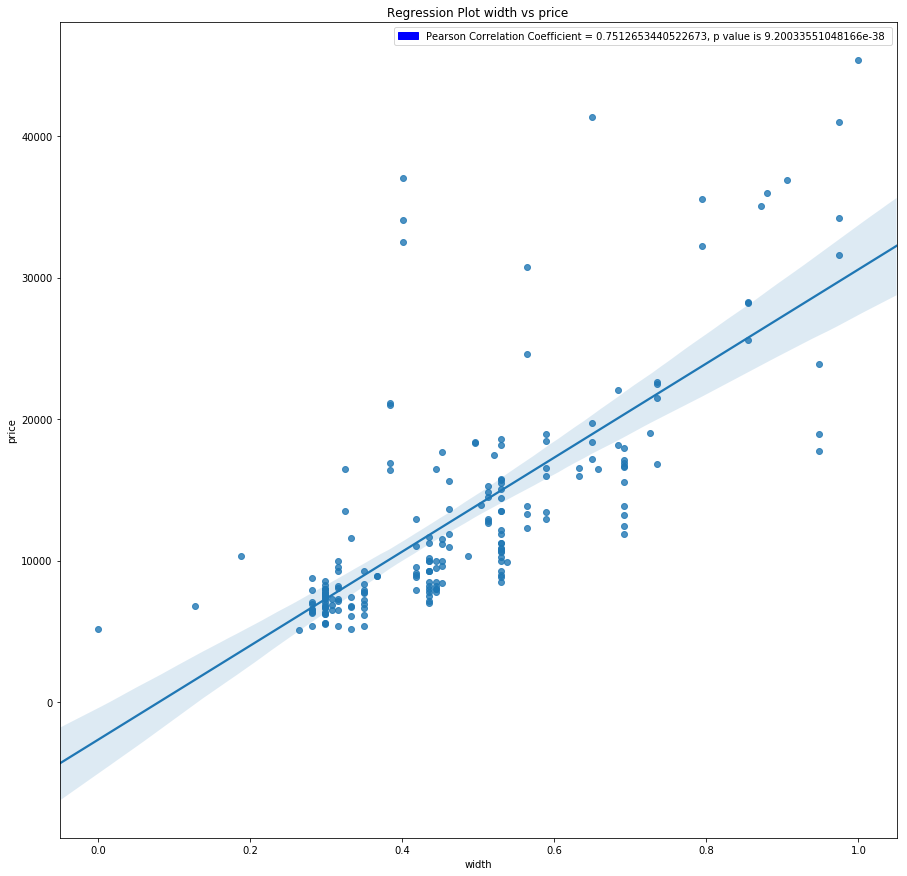

In [17]:
coeff_values = calculateCorrelationCoefficientsAndpValues(data['width'], data['price'])
plotRegressionBetweenTwoVariables( 'width', 'price', data[['width', 'price']], coeff_values[0], coeff_values[1])




The Pearson Correlation Coefficient is 0.1354863075680597 with a P-value of P = 0.05514627325101211


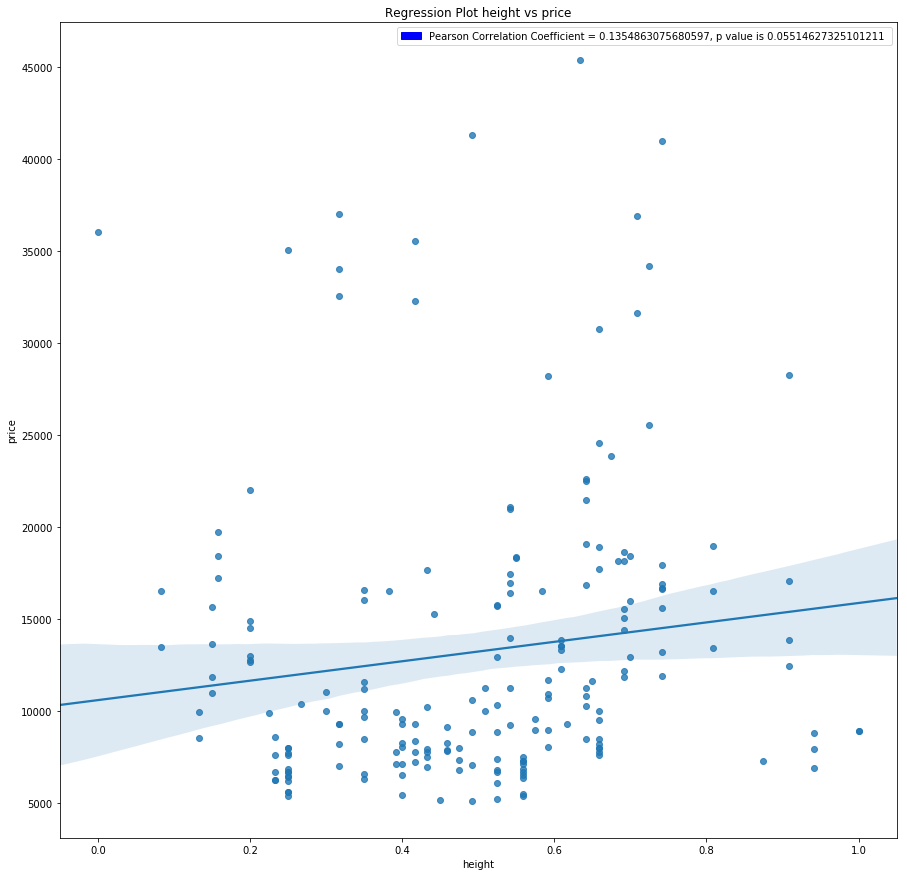

In [18]:
coeff_values = calculateCorrelationCoefficientsAndpValues(data['height'], data['price'])
plotRegressionBetweenTwoVariables( 'height', 'price', data[['height', 'price']], coeff_values[0], coeff_values[1])



Based on the above observations we can see that :

1. symboling : not related , will not be included in our data features

2. height : not related , will not be included in our data features

3. length and width :  related , will  be included in our data features